# Parameters

Esta tabla contiene la información de los grupos de parámetros de funciones y Lambda expresiones.  --> ABEL COMPLETAR <--

## 1 - Obtencion de datos

In [1]:
import matplotlib.pyplot as plt
from notebooks_utils import *
from domains import *

full_table = get_data('parameters')

# Table name, features and target.
TABLE_NAME = 'parameters'
TABLE_FEATURES = ['parameters__parameters_role', 'parameters__number_of_params', 'parameters__pos_only_param_pct', 'parameters__var_param_pct', 'parameters__has_var_param', 'parameters__type_annotation_pct', 'parameters__kw_only_param_pct', 'parameters__default_value_pct', 'parameters__has_kw_param', 'parameters__name_convention', 'parameters__expertise_level']
TABLE_TARGET = 'parameters__expertise_level'

# Load features and target.
X, y = full_table[TABLE_FEATURES], full_table[[TABLE_TARGET]].iloc[:,0]

# Print information about the loaded table.
print(f'Features shape: {X.shape}')
print(f'Target shape: {y.shape}')

print(f'As we can see the downloaded data contains a total of {X.shape[0]} instances. For each instance we have {X.shape[1]} attributes.')

2024-06-19 19:37:44.961789 Data cache files found ...
2024-06-19 19:37:45.006360 Data cache files successfully loaded!!
Features shape: (153898, 11)
Target shape: (153898,)
As we can see the downloaded data contains a total of 153898 instances. For each instance we have 11 attributes.


## 2 - Exploracion de datos

Una vez tenemos nuestra tabla en un dataframe el siguiente paso es explorarla para ver qué tipo de información contiene.

In [2]:
print(X.info())
print('=============')
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153898 entries, 0 to 153897
Data columns (total 11 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   parameters__parameters_role      153898 non-null  object 
 1   parameters__number_of_params     153898 non-null  int64  
 2   parameters__pos_only_param_pct   153898 non-null  float64
 3   parameters__var_param_pct        153898 non-null  float64
 4   parameters__has_var_param        153898 non-null  bool   
 5   parameters__type_annotation_pct  153898 non-null  float64
 6   parameters__kw_only_param_pct    153898 non-null  float64
 7   parameters__default_value_pct    153898 non-null  float64
 8   parameters__has_kw_param         153898 non-null  bool   
 9   parameters__name_convention      139250 non-null  object 
 10  parameters__expertise_level      153898 non-null  object 
dtypes: bool(2), float64(5), int64(1), object(3)
memory usage: 10.9+ M

Cómo podemos ver la tabla está compuesta por 6 variables numéricas, 2 variables boleanas y tres de tipo objeto.

### 2.1 - Balance de clases

In [3]:
instances_for_class_low = len(full_table[full_table[TABLE_TARGET] == "BEGINNER"])
instances_for_class_high = len(full_table[full_table[TABLE_TARGET] == "EXPERT"])

print(f"The dataset contains {instances_for_class_low/len(full_table)*100:.4}% instances for BEGINNER class and {instances_for_class_high/len(full_table)*100:.4}% for EXPERT class.")

The dataset contains 40.13% instances for BEGINNER class and 59.87% for EXPERT class.


### 2.2 - Duplicados
Miramos si la tabla tiene entradas duplicadas.

In [4]:
number_of_duplicated_entries = sum(full_table.duplicated(subset=TABLE_FEATURES + [TABLE_TARGET]))
duplicated_entries_pct = number_of_duplicated_entries / len(full_table) * 100
print(f"The dataset contains [{duplicated_entries_pct:.4}%] of duplicated entries.")

The dataset contains [98.63%] of duplicated entries.


### 2.3 - Valores Nulos 
Miramos si alguna de las variables que contiene la tabla contiene algún valor que sea nulo.

In [5]:
X.isnull().sum()

parameters__parameters_role            0
parameters__number_of_params           0
parameters__pos_only_param_pct         0
parameters__var_param_pct              0
parameters__has_var_param              0
parameters__type_annotation_pct        0
parameters__kw_only_param_pct          0
parameters__default_value_pct          0
parameters__has_kw_param               0
parameters__name_convention        14648
parameters__expertise_level            0
dtype: int64

In [6]:
print_empty_cols(X)

parameters__parameters_role
---------------------------
0 instancias no tienen un valor para la columna parameters__parameters_role


parameters__number_of_params
----------------------------
0 instancias no tienen un valor para la columna parameters__number_of_params


parameters__pos_only_param_pct
------------------------------
0 instancias no tienen un valor para la columna parameters__pos_only_param_pct


parameters__var_param_pct
-------------------------
0 instancias no tienen un valor para la columna parameters__var_param_pct


parameters__has_var_param
-------------------------
0 instancias no tienen un valor para la columna parameters__has_var_param


parameters__type_annotation_pct
-------------------------------
0 instancias no tienen un valor para la columna parameters__type_annotation_pct


parameters__kw_only_param_pct
-----------------------------
0 instancias no tienen un valor para la columna parameters__kw_only_param_pct


parameters__default_value_pct
--------------

### 2.4 - Describimos los valores de las variables de la tabla.

In [7]:
np.transpose(X.describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
parameters__parameters_role,153898,2,FunctionParams,147968,NaN,NaN,NaN,NaN,NaN,NaN,NaN
parameters__number_of_params,153898.0,NaN,NaN,NaN,1.984964,1.95282,0.0,1.0,2.0,2.0,58.0
parameters__pos_only_param_pct,153898.0,NaN,NaN,NaN,0.000029,0.004184,0.0,0.0,0.0,0.0,0.666667
parameters__var_param_pct,153898.0,NaN,NaN,NaN,0.009579,0.073176,0.0,0.0,0.0,0.0,1.0
parameters__has_var_param,153898,2,False,150621,NaN,NaN,NaN,NaN,NaN,NaN,NaN
parameters__type_annotation_pct,153898.0,NaN,NaN,NaN,0.1643,0.323715,0.0,0.0,0.0,0.0,1.0
parameters__kw_only_param_pct,153898.0,NaN,NaN,NaN,0.005285,0.060098,0.0,0.0,0.0,0.0,1.0
parameters__default_value_pct,153898.0,NaN,NaN,NaN,0.08372,0.209361,0.0,0.0,0.0,0.0,1.0
parameters__has_kw_param,153898,2,False,144584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
parameters__name_convention,139250,7,Lower,108441,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Vamos a discretizar las variables numericas, agrupando conjuntos de valores en categorias, para hacer un análisis de los datos. Para cada variable es necesario ver la distribucion de lo valores para hacer los bins (categorias).

In [8]:
# DISCRETIZATION
X_copy = X.copy()

discretized_columns = {
    "parameters__number_of_params": [(0.0, 1.0), (1.0, 2.0), (2.0, 2.0), (2.0, inf)], # min: 0 ; max: 58
    "parameters__pos_only_param_pct": [(0.0, 0.0), (0.0, inf)], # min: 0 ; max: 0.67
    "parameters__var_param_pct": [(0.0, 0.0), (0.0, inf)], # min: 0.0 ; max: 1.0
    "parameters__type_annotation_pct": [(0.0, 0.0), (0.0, inf)], # min: 0 ; max: 0.67
    "parameters__kw_only_param_pct": [(0.0, 0.0), (0.0, inf)], # min: 0 ; max: 0.67
    "parameters__default_value_pct": [(0.0, 0.0), (0.0, inf)], # min: 0 ; max: 0.67
}

discretize_columns(X_copy, discretized_columns)
    
# SINGLE FEATURE
print("--- SINGLE FEATURE ---")
print(get_statistics(X_copy, ['parameters__number_of_params'], 10))
print(get_statistics(X_copy, ['parameters__pos_only_param_pct'], 10))
print(get_statistics(X_copy, ['parameters__var_param_pct'], 10))
print(get_statistics(X_copy, ['parameters__type_annotation_pct'], 10))
print(get_statistics(X_copy, ['parameters__kw_only_param_pct'], 10))
print(get_statistics(X_copy, ['parameters__default_value_pct'], 10))
print(get_statistics(full_table, ['parameters__name_convention'], 10))
print(get_statistics(full_table, ['parameters__parameters_role'], 10))
print(get_statistics(X_copy, ['parameters__has_var_param'], 10))
print(get_statistics(X_copy, ['parameters__has_kw_param'], 10))
# 2 FEATURES
print("--- TWO FEATURES ---")
#print(get_statistics(X_copy, ['functiondef__number_of_characters', 'functiondef__name_convention_SnakeCase'], 10))
#print(get_statistics(X_copy, ['functiondef__number_of_characters', 'functiondef__name_convention_Lower'], 10))

# 3 FEATURES
print("--- THREE FEATURES ---")
#print(get_statistics(X_copy, ['module__class_defs_pct', 'module__function_defs_pct', 'module__enum_defs_pct'], 10))

--- SINGLE FEATURE ---
parameters__number_of_params  count  percentage
                   [1.0_2.0)  60723   39.456653
                   [2.0_2.0]  41501   26.966562
                   [2.0_inf]  37026   24.058792
                   [0.0_1.0)  14648    9.517992

parameters__pos_only_param_pct  count  percentage
                     [0.0_0.0] 153890   99.994802
                     [0.0_inf]      8    0.005198

parameters__var_param_pct  count  percentage
                [0.0_0.0] 150621   97.870668
                [0.0_inf]   3277    2.129332

parameters__type_annotation_pct  count  percentage
                      [0.0_0.0] 119498   77.647533
                      [0.0_inf]  34400   22.352467

parameters__kw_only_param_pct  count  percentage
                    [0.0_0.0] 152528     99.1098
                    [0.0_inf]   1370      0.8902

parameters__default_value_pct  count  percentage
                    [0.0_0.0] 129089   83.879583
                    [0.0_inf]  24809   16.120417


In [9]:
def normalize_datatypes(X:pd.DataFrame, y:pd.Series) -> (pd.DataFrame, pd.Series, [str]):
    X = pd.get_dummies(X)
    X = X.astype('float32')
    y = y.apply(lambda value: 0 if value == "BEGINNER" else 1) # EXPERT will be 1 and BEGINNER will be 0.
    y = y.astype('float32')
    columns_names = X.columns.tolist()
    return X, y, columns_names

X, y, TABLE_FEATURES = normalize_datatypes(X, y)
# Print information about the loaded table
print(f'Features shape: {X.shape}')
print(f'Target shape: {y.shape}')

Features shape: (153898, 19)
Target shape: (153898,)


#### Muestra la matriz de correlación de pearson entre las variables de la tabla.

<Axes: >

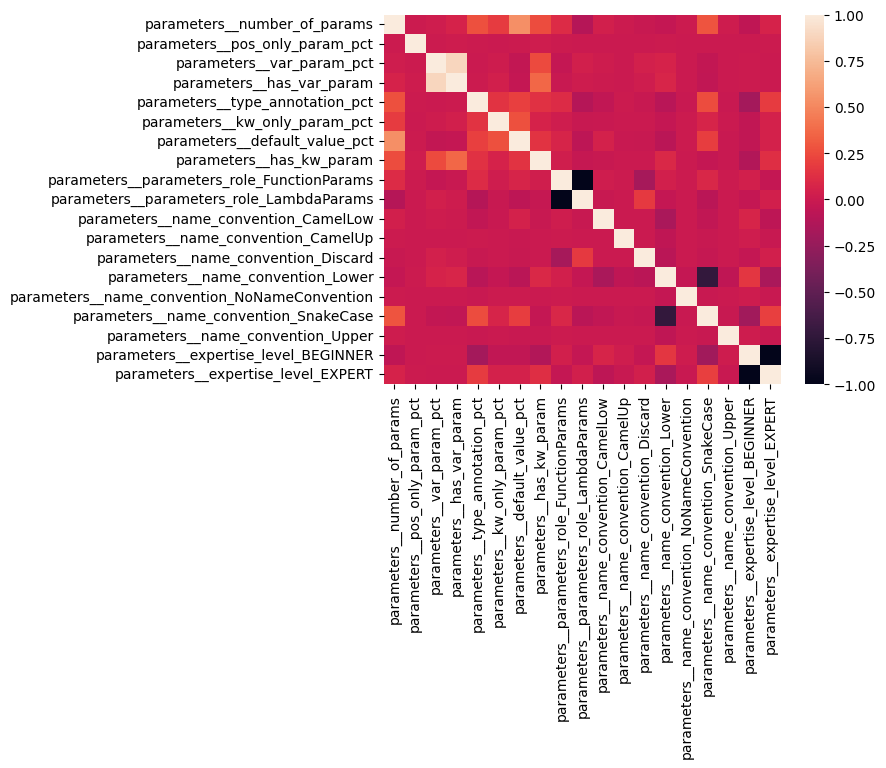

In [10]:
sns.heatmap(X.corr(), annot=False)

## 3 - Detección de valores atípicos (outliers)
## Univariate
## Analisis detallado de variables
Para cada una de las 10 variable (2 booleanas, 5 porcentuales, 1 numerica y 2 cetgoricas) se hara un analisis detallado

### Variable has_var_param (1/10)
Esta variable es de tipo booleano y representa existe al menos un parámetro del tipo vararg.

<Axes: xlabel='parameters__has_var_param', ylabel='Count'>

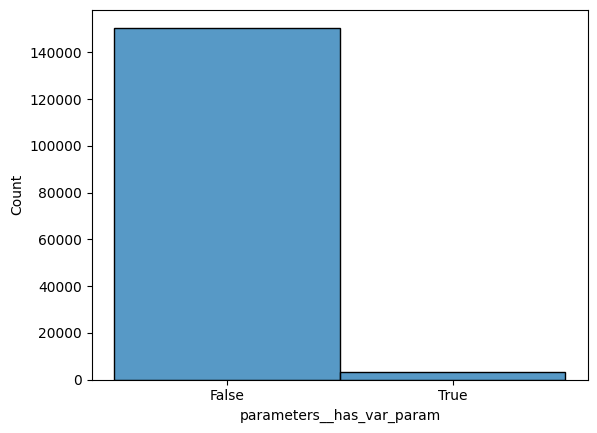

In [11]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['parameters__has_var_param'], discrete=True)

In [12]:
num_true_values = len(X[X['parameters__has_var_param'] == True])
num_false_values = len(X[X['parameters__has_var_param'] == False])
std = X['parameters__has_var_param'].std()
freq_true = len(X[X['parameters__has_var_param'] == True]) / len(X['parameters__has_var_param'])
freq_false = len(X[X['parameters__has_var_param'] == False]) / len(X['parameters__has_var_param'])
print(f'La variable has_var_param contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable has_var_param a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable has_var_param a False es {freq_false}.')

La variable has_var_param contiene 3277 valores verdaderos y 150621 valores falsos. Y, la desviación típica es de 0.14436084032058716
La frecuencia con la que programa puede tener la variable has_var_param a True es 0.021293324149761532.
La frecuencia con la que programa puede tener la variable has_var_param a False es 0.9787066758502385.


In [13]:
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'parameters__has_var_param', possible_values)

La variable parameters__has_var_param contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable parameters__has_var_param toma el valor de 0.0 en un 97.87% de los items.
La variable parameters__has_var_param toma el valor de 1.0 en un 2.129% de los items.


In [14]:
X[X['parameters__has_var_param'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,parameters__number_of_params,parameters__pos_only_param_pct,parameters__var_param_pct,parameters__has_var_param,parameters__type_annotation_pct,parameters__kw_only_param_pct,parameters__default_value_pct,parameters__has_kw_param,parameters__parameters_role_FunctionParams,parameters__parameters_role_LambdaParams,parameters__name_convention_CamelLow,parameters__name_convention_CamelUp,parameters__name_convention_Discard,parameters__name_convention_Lower,parameters__name_convention_NoNameConvention,parameters__name_convention_SnakeCase,parameters__name_convention_Upper,parameters__expertise_level_BEGINNER,parameters__expertise_level_EXPERT
count,3277.000000,3277.000000,3277.000000,3277.0,3277.000000,3277.000000,3277.000000,3277.000000,3277.000000,3277.000000,3277.000000,3277.0,3277.000000,3277.000000,3277.0,3277.000000,3277.0,3277.000000,3277.000000
mean,2.749466,0.000356,0.449873,1.0,0.169783,0.018145,0.030347,0.648459,0.944156,0.055844,0.011596,0.0,0.010375,0.927373,0.0,0.050656,0.0,0.411657,0.588343
std,1.328897,0.012001,0.231117,0.0,0.325917,0.089171,0.110480,0.477524,0.229655,0.229655,0.107075,0.0,0.101345,0.259564,0.0,0.219328,0.0,0.492209,0.492209
min,1.000000,0.000000,0.058824,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
25%,2.000000,0.000000,0.333333,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.0,0.000000,0.0,0.000000,0.000000
50%,3.000000,0.000000,0.333333,1.0,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.0,0.000000,0.0,0.000000,1.000000
75%,3.000000,0.000000,0.500000,1.0,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.0,0.000000,0.0,1.000000,1.000000
max,17.000000,0.500000,1.000000,1.0,1.000000,0.823529,0.823529,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,0.0,1.000000,1.000000


### Variable has_kw_param (2/10)
Esta variable es de tipo booleano y representa si existe al menos un parámetro del tipo kwarg.

<Axes: xlabel='parameters__has_kw_param', ylabel='Count'>

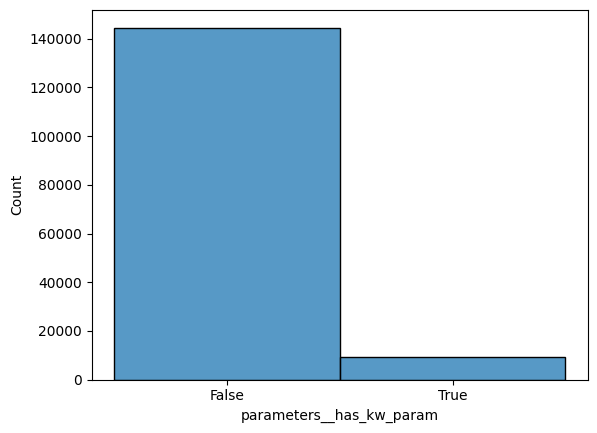

In [15]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['parameters__has_kw_param'], discrete=True)

In [16]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['parameters__has_kw_param'] == True])
num_false_values = len(X[X['parameters__has_kw_param'] == False])
std = X['parameters__has_kw_param'].std()
freq_true = len(X[X['parameters__has_kw_param'] == True]) / len(X['parameters__has_kw_param'])
freq_false = len(X[X['parameters__has_kw_param'] == False]) / len(X['parameters__has_kw_param'])
print(f'La variable has_kw_param contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable has_kw_param a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable has_kw_param a False es {freq_false}.')

La variable has_kw_param contiene 9314 valores verdaderos y 144584 valores falsos. Y, la desviación típica es de 0.23844964802265167
La frecuencia con la que programa puede tener la variable has_kw_param a True es 0.06052060455626454.
La frecuencia con la que programa puede tener la variable has_kw_param a False es 0.9394793954437355.


In [17]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'parameters__has_kw_param', possible_values)

La variable parameters__has_kw_param contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable parameters__has_kw_param toma el valor de 0.0 en un 93.95% de los items.
La variable parameters__has_kw_param toma el valor de 1.0 en un 6.052% de los items.


In [18]:
X[X['parameters__has_kw_param'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,parameters__number_of_params,parameters__pos_only_param_pct,parameters__var_param_pct,parameters__has_var_param,parameters__type_annotation_pct,parameters__kw_only_param_pct,parameters__default_value_pct,parameters__has_kw_param,parameters__parameters_role_FunctionParams,parameters__parameters_role_LambdaParams,parameters__name_convention_CamelLow,parameters__name_convention_CamelUp,parameters__name_convention_Discard,parameters__name_convention_Lower,parameters__name_convention_NoNameConvention,parameters__name_convention_SnakeCase,parameters__name_convention_Upper,parameters__expertise_level_BEGINNER,parameters__expertise_level_EXPERT
count,9314.000000,9314.000000,9314.000000,9314.000000,9314.000000,9314.000000,9314.000000,9314.0,9314.000000,9314.000000,9314.000000,9314.000000,9314.000000,9314.000000,9314.0,9314.000000,9314.000000,9314.000000,9314.000000
mean,3.955658,0.000412,0.079678,0.228151,0.339809,0.019216,0.200897,1.0,0.982822,0.017178,0.002684,0.000644,0.002577,0.861606,0.0,0.132381,0.000107,0.172965,0.827035
std,3.251488,0.015538,0.154362,0.419663,0.364298,0.106196,0.259824,0.0,0.129943,0.129943,0.051742,0.025374,0.050699,0.345331,0.0,0.338923,0.010362,0.378238,0.378238
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,1.000000
50%,3.000000,0.000000,0.000000,0.000000,0.117647,0.000000,0.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,1.000000
75%,4.000000,0.000000,0.000000,0.000000,0.666667,0.000000,0.500000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,1.000000
max,53.000000,0.666667,0.500000,1.000000,1.000000,0.944444,0.950000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


El 82% de los parameters con has_kw_param a True es de programas de EXPERTOS.

### Variable number_of_params (3/10)
Esta variable representa el número de parámetros que hay en el conjuto de la entidad parameters. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 58. Con una media de 1.988.

<Axes: ylabel='parameters__number_of_params'>

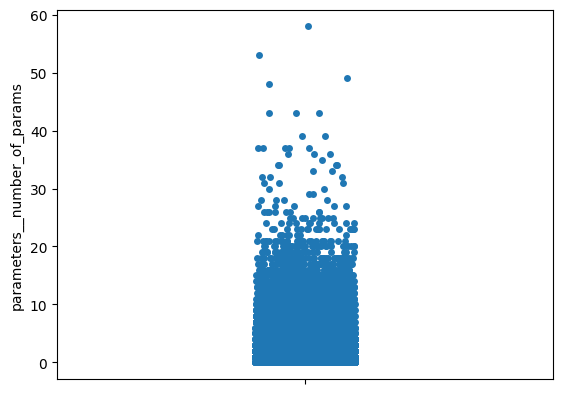

In [19]:
sns.stripplot(X['parameters__number_of_params'])

In [20]:
print_outliers_for_df_column(X, 'parameters__number_of_params')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.46564686195603733
Rango valores atípicos extremos (Tukey): [-2.0,5.0]
Rango valores atípicos leves (Tukey): [-0.5,3.5]
Rango valores atípicos extremos (Fixed BoxPlot): [0.7060362765075323,11.660569065219189]
-3.0IQR: 0 instancias tienen un valor para parameters__number_of_params inferior a -2.0 (Q1-3*IQR) para parameters__number_of_params. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para parameters__number_of_params inferior a -0.5 (Q1-1.5*IQR) para parameters__number_of_params. Representando un 0.0% del total de instancias.
+1.5IQR: 18301 instancias tienen un valor para parameters__number_of_params superior a 3.5 (Q3+1.5*IQR) para parameters__number_of_params. Representando un 11.89% del total de instancias.
+3.0IQR: 5827 instancias tienen un valor para parameters__number_of_params superior a 5.0 (Q3-3*IQR) para parameters__number_of_params. Representando un 3.786% del total de instanc

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 11.0 (Con un MC de 46 usamos U)

In [21]:
X[X['parameters__number_of_params'] > 11].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,parameters__number_of_params,parameters__pos_only_param_pct,parameters__var_param_pct,parameters__has_var_param,parameters__type_annotation_pct,parameters__kw_only_param_pct,parameters__default_value_pct,parameters__has_kw_param,parameters__parameters_role_FunctionParams,parameters__parameters_role_LambdaParams,parameters__name_convention_CamelLow,parameters__name_convention_CamelUp,parameters__name_convention_Discard,parameters__name_convention_Lower,parameters__name_convention_NoNameConvention,parameters__name_convention_SnakeCase,parameters__name_convention_Upper,parameters__expertise_level_BEGINNER,parameters__expertise_level_EXPERT
count,1017.000000,1017.0,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.0,1017.0,1017.000000,1017.0,1017.0,1017.000000,1017.0,1017.000000,1017.000000,1017.000000,1017.000000
mean,15.993117,0.0,0.000738,0.009833,0.476997,0.089807,0.723687,0.308751,1.0,0.0,0.006883,0.0,0.0,0.179941,0.0,0.810226,0.002950,0.169125,0.830875
std,5.254259,0.0,0.007479,0.098721,0.448448,0.256600,0.270482,0.462206,0.0,0.0,0.082718,0.0,0.0,0.384327,0.0,0.392315,0.054259,0.375047,0.375047
min,12.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,13.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.714286,0.000000,1.0,0.0,0.000000,0.0,0.0,0.000000,0.0,1.000000,0.000000,0.000000,1.000000
50%,14.000000,0.0,0.000000,0.000000,0.388889,0.000000,0.818182,0.000000,1.0,0.0,0.000000,0.0,0.0,0.000000,0.0,1.000000,0.000000,0.000000,1.000000
75%,17.000000,0.0,0.000000,0.000000,0.928571,0.000000,0.900000,1.000000,1.0,0.0,0.000000,0.0,0.0,0.000000,0.0,1.000000,0.000000,0.000000,1.000000
max,58.000000,0.0,0.083333,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.0,1.000000,0.0,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


El 83% de es de expertos.

### Variable pos_only_param_pct (4/10)
Esta variable representa la proporción de los parámetros pos_only. Toma los valores de 0.0 - 0.667. La media es 0.000029.

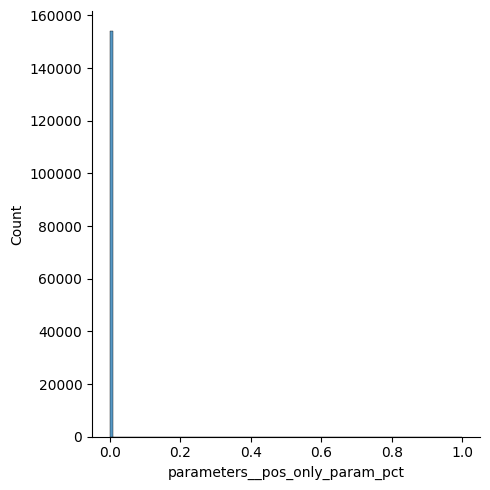

In [22]:
sns.displot(X['parameters__pos_only_param_pct'], bins=[i / 100 for i in range(0, 101)])

In [23]:
print_outliers_for_df_column(X, 'parameters__pos_only_param_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.996483927194678
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para parameters__pos_only_param_pct inferior a 0.0 (Q1-3*IQR) para parameters__pos_only_param_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para parameters__pos_only_param_pct inferior a 0.0 (Q1-1.5*IQR) para parameters__pos_only_param_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 8 instancias tienen un valor para parameters__pos_only_param_pct superior a 0.0 (Q3+1.5*IQR) para parameters__pos_only_param_pct. Representando un 0.005198% del total de instancias.
+3.0IQR: 8 instancias tienen un valor para parameters__pos_only_param_pct superior a 0.0 (Q3-3*IQR) para parameters__pos_only_param_pct. Representando un 0.005198% del total de instancias.
L: 0 instancias 

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0 (Todos los umbrales son 0)

In [24]:
X[X['parameters__pos_only_param_pct'] > 0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,parameters__number_of_params,parameters__pos_only_param_pct,parameters__var_param_pct,parameters__has_var_param,parameters__type_annotation_pct,parameters__kw_only_param_pct,parameters__default_value_pct,parameters__has_kw_param,parameters__parameters_role_FunctionParams,parameters__parameters_role_LambdaParams,parameters__name_convention_CamelLow,parameters__name_convention_CamelUp,parameters__name_convention_Discard,parameters__name_convention_Lower,parameters__name_convention_NoNameConvention,parameters__name_convention_SnakeCase,parameters__name_convention_Upper,parameters__expertise_level_BEGINNER,parameters__expertise_level_EXPERT
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.0,8.000000,8.000000,8.0,8.0,8.0,8.0,8.0,8.000000,8.0,8.000000,8.0,8.0,8.0
mean,3.125000,0.562500,0.114583,0.375000,0.375000,0.0,0.125000,0.875000,1.0,0.0,0.0,0.0,0.0,0.875000,0.0,0.125000,0.0,0.0,1.0
std,0.353553,0.152688,0.160217,0.517549,0.415474,0.0,0.172516,0.353553,0.0,0.0,0.0,0.0,0.0,0.353553,0.0,0.353553,0.0,0.0,0.0
min,3.000000,0.333333,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,1.0
25%,3.000000,0.458333,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.000000,0.0,0.0,1.0
50%,3.000000,0.666667,0.000000,0.000000,0.333333,0.0,0.000000,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.000000,0.0,0.0,1.0
75%,3.000000,0.666667,0.270833,1.000000,0.666667,0.0,0.333333,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.000000,0.0,0.0,1.0
max,4.000000,0.666667,0.333333,1.000000,1.000000,0.0,0.333333,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.0,1.000000,0.0,0.0,1.0


### Variable type_annotation_pct (5/10)
Esta variable representa la proporción de los parámetros que tienen anotación de tipo. Este campo toma valores del 0.0 - 1.0. Su media es 0.1646.

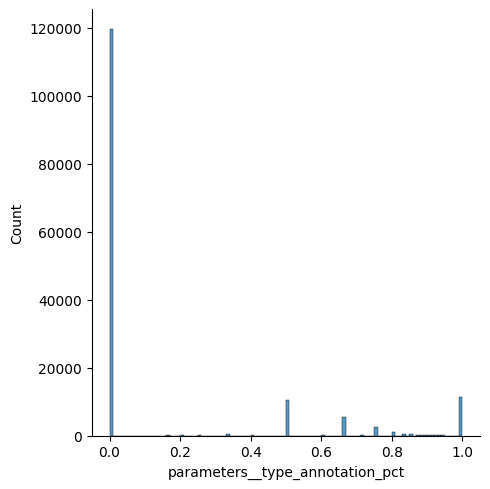

In [25]:
sns.displot(X['parameters__type_annotation_pct'], bins=[i / 100 for i in range(0, 101)])

In [26]:
print_outliers_for_df_column(X, 'parameters__type_annotation_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.6640768255024468
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para parameters__type_annotation_pct inferior a 0.0 (Q1-3*IQR) para parameters__type_annotation_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para parameters__type_annotation_pct inferior a 0.0 (Q1-1.5*IQR) para parameters__type_annotation_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 34400 instancias tienen un valor para parameters__type_annotation_pct superior a 0.0 (Q3+1.5*IQR) para parameters__type_annotation_pct. Representando un 22.35% del total de instancias.
+3.0IQR: 34400 instancias tienen un valor para parameters__type_annotation_pct superior a 0.0 (Q3-3*IQR) para parameters__type_annotation_pct. Representando un 22.35% del total de instancias.
L: 0 

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0 (Todos los umbrales son 0)

In [27]:
X[X['parameters__type_annotation_pct'] > 0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,parameters__number_of_params,parameters__pos_only_param_pct,parameters__var_param_pct,parameters__has_var_param,parameters__type_annotation_pct,parameters__kw_only_param_pct,parameters__default_value_pct,parameters__has_kw_param,parameters__parameters_role_FunctionParams,parameters__parameters_role_LambdaParams,parameters__name_convention_CamelLow,parameters__name_convention_CamelUp,parameters__name_convention_Discard,parameters__name_convention_Lower,parameters__name_convention_NoNameConvention,parameters__name_convention_SnakeCase,parameters__name_convention_Upper,parameters__expertise_level_BEGINNER,parameters__expertise_level_EXPERT
count,34400.000000,34400.000000,34400.000000,34400.000000,34400.000000,34400.000000,34400.000000,34400.000000,34400.0,34400.0,34400.000000,34400.000000,34400.00000,34400.000000,34400.000000,34400.000000,34400.000000,34400.000000,34400.000000
mean,3.016134,0.000078,0.008279,0.022180,0.735044,0.019842,0.156676,0.136657,1.0,0.0,0.000116,0.001860,0.00061,0.638692,0.000058,0.358227,0.000436,0.209797,0.790204
std,2.556391,0.007189,0.061196,0.147272,0.222017,0.115977,0.272025,0.343490,0.0,0.0,0.010783,0.043094,0.02470,0.480387,0.007625,0.479486,0.020877,0.407169,0.407169
min,1.000000,0.000000,0.000000,0.000000,0.034483,0.000000,0.000000,0.000000,1.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,1.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2.000000,0.000000,0.000000,0.000000,0.666667,0.000000,0.000000,0.000000,1.0,0.0,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.333333,0.000000,1.0,0.0,0.000000,0.000000,0.00000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,58.000000,0.666667,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.0,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


80% expertos y 20% beginners.

### Variable var_param_pct (6/10)
Esta variable representa la proporción de los parámetros que son del tipo vararg. Este campo toma valores del 0.0 - 1.0. Su media es 0.009543.

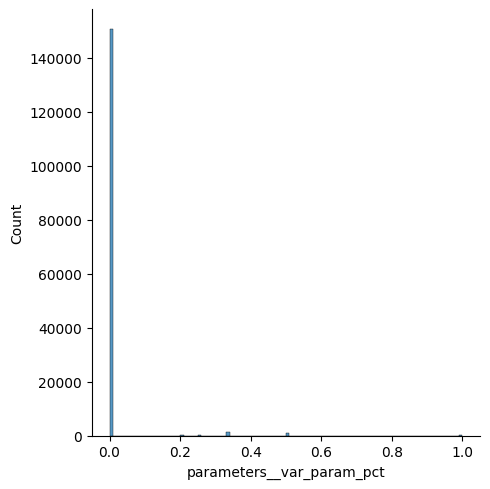

In [28]:
sns.displot(X['parameters__var_param_pct'], bins=[i / 100 for i in range(0, 101)])

In [29]:
print_outliers_for_df_column(X, 'parameters__var_param_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.9297568648134944
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para parameters__var_param_pct inferior a 0.0 (Q1-3*IQR) para parameters__var_param_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para parameters__var_param_pct inferior a 0.0 (Q1-1.5*IQR) para parameters__var_param_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 3277 instancias tienen un valor para parameters__var_param_pct superior a 0.0 (Q3+1.5*IQR) para parameters__var_param_pct. Representando un 2.129% del total de instancias.
+3.0IQR: 3277 instancias tienen un valor para parameters__var_param_pct superior a 0.0 (Q3-3*IQR) para parameters__var_param_pct. Representando un 2.129% del total de instancias.
L: 0 instancias tienen un valor para parameters__var_pa

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0 (Todos los umbrales son 0)

In [30]:
X[X['parameters__var_param_pct'] > 0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,parameters__number_of_params,parameters__pos_only_param_pct,parameters__var_param_pct,parameters__has_var_param,parameters__type_annotation_pct,parameters__kw_only_param_pct,parameters__default_value_pct,parameters__has_kw_param,parameters__parameters_role_FunctionParams,parameters__parameters_role_LambdaParams,parameters__name_convention_CamelLow,parameters__name_convention_CamelUp,parameters__name_convention_Discard,parameters__name_convention_Lower,parameters__name_convention_NoNameConvention,parameters__name_convention_SnakeCase,parameters__name_convention_Upper,parameters__expertise_level_BEGINNER,parameters__expertise_level_EXPERT
count,3277.000000,3277.000000,3277.000000,3277.0,3277.000000,3277.000000,3277.000000,3277.000000,3277.000000,3277.000000,3277.000000,3277.0,3277.000000,3277.000000,3277.0,3277.000000,3277.0,3277.000000,3277.000000
mean,2.749466,0.000356,0.449873,1.0,0.169783,0.018145,0.030347,0.648459,0.944156,0.055844,0.011596,0.0,0.010375,0.927373,0.0,0.050656,0.0,0.411657,0.588343
std,1.328897,0.012001,0.231117,0.0,0.325917,0.089171,0.110480,0.477524,0.229655,0.229655,0.107075,0.0,0.101345,0.259564,0.0,0.219328,0.0,0.492209,0.492209
min,1.000000,0.000000,0.058824,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
25%,2.000000,0.000000,0.333333,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.0,0.000000,0.0,0.000000,0.000000
50%,3.000000,0.000000,0.333333,1.0,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.0,0.000000,0.0,0.000000,1.000000
75%,3.000000,0.000000,0.500000,1.0,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.0,0.000000,0.0,1.000000,1.000000
max,17.000000,0.500000,1.000000,1.0,1.000000,0.823529,0.823529,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,0.0,1.000000,1.000000


### Variable kw_only_param_pct (7/10)
Esta variable representa la proporción de los parámetros del tipo kw_only. Este campo toma valores del 0.0 - 1.0. Su media es 0.005296.

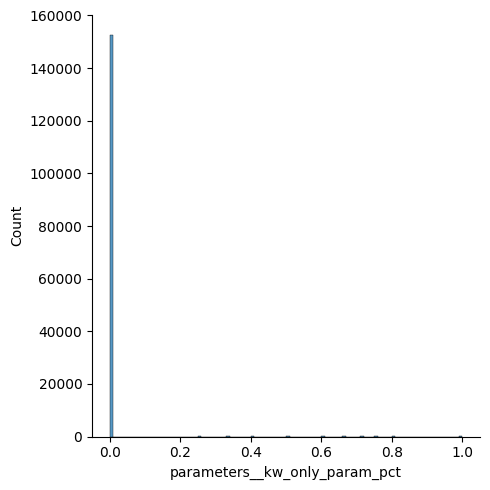

In [31]:
sns.displot(X['parameters__kw_only_param_pct'], bins=[i / 100 for i in range(0, 101)])

In [32]:
print_outliers_for_df_column(X, 'parameters__kw_only_param_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.95338502956785
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para parameters__kw_only_param_pct inferior a 0.0 (Q1-3*IQR) para parameters__kw_only_param_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para parameters__kw_only_param_pct inferior a 0.0 (Q1-1.5*IQR) para parameters__kw_only_param_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 1370 instancias tienen un valor para parameters__kw_only_param_pct superior a 0.0 (Q3+1.5*IQR) para parameters__kw_only_param_pct. Representando un 0.8902% del total de instancias.
+3.0IQR: 1370 instancias tienen un valor para parameters__kw_only_param_pct superior a 0.0 (Q3-3*IQR) para parameters__kw_only_param_pct. Representando un 0.8902% del total de instancias.
L: 0 instancias tienen 

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0 (Todos los umbrales son 0)

In [33]:
X[X['parameters__kw_only_param_pct'] > 0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,parameters__number_of_params,parameters__pos_only_param_pct,parameters__var_param_pct,parameters__has_var_param,parameters__type_annotation_pct,parameters__kw_only_param_pct,parameters__default_value_pct,parameters__has_kw_param,parameters__parameters_role_FunctionParams,parameters__parameters_role_LambdaParams,parameters__name_convention_CamelLow,parameters__name_convention_CamelUp,parameters__name_convention_Discard,parameters__name_convention_Lower,parameters__name_convention_NoNameConvention,parameters__name_convention_SnakeCase,parameters__name_convention_Upper,parameters__expertise_level_BEGINNER,parameters__expertise_level_EXPERT
count,1370.000000,1370.0,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.0,1370.0,1370.0,1370.000000,1370.000000,1370.000000,1370.0,1370.000000,1370.000000
mean,5.657664,0.0,0.026208,0.108759,0.668361,0.593723,0.649497,0.248905,0.999270,0.000730,0.0,0.0,0.0,0.602920,0.001460,0.395620,0.0,0.131387,0.868613
std,3.933565,0.0,0.082148,0.311450,0.342976,0.237486,0.227553,0.432537,0.027017,0.027017,0.0,0.0,0.0,0.489472,0.038194,0.489162,0.0,0.337946,0.337946
min,1.000000,0.0,0.000000,0.000000,0.000000,0.076923,0.142857,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,3.000000,0.0,0.000000,0.000000,0.500000,0.400000,0.500000,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,1.000000
50%,4.000000,0.0,0.000000,0.000000,0.800000,0.600000,0.666667,0.000000,1.000000,0.000000,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.0,0.000000,1.000000
75%,7.000000,0.0,0.000000,0.000000,0.928571,0.796429,0.833333,0.000000,1.000000,0.000000,0.0,0.0,0.0,1.000000,0.000000,1.000000,0.0,0.000000,1.000000
max,39.000000,0.0,0.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


86% expertos y 14% beginners

### Variable default_value_pct (8/10)
Esta variable representa la proporción de los parámetros que tienen valor por defecto. Este campo toma valores del 0.0 - 1.0. Su media es 0.0839.

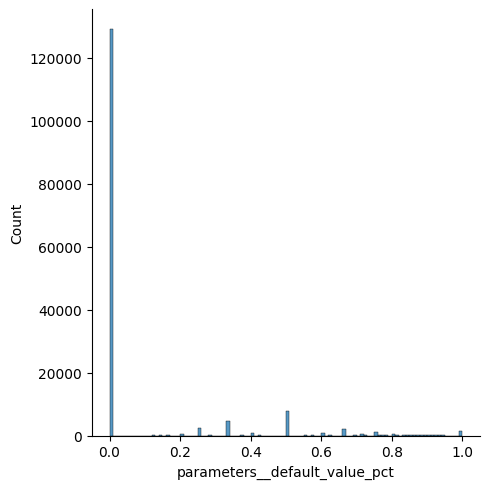

In [34]:
sns.displot(X['parameters__default_value_pct'], bins=[i / 100 for i in range(0, 101)])

In [35]:
print_outliers_for_df_column(X, 'parameters__default_value_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.7581995882551522
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para parameters__default_value_pct inferior a 0.0 (Q1-3*IQR) para parameters__default_value_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para parameters__default_value_pct inferior a 0.0 (Q1-1.5*IQR) para parameters__default_value_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 24809 instancias tienen un valor para parameters__default_value_pct superior a 0.0 (Q3+1.5*IQR) para parameters__default_value_pct. Representando un 16.12% del total de instancias.
+3.0IQR: 24809 instancias tienen un valor para parameters__default_value_pct superior a 0.0 (Q3-3*IQR) para parameters__default_value_pct. Representando un 16.12% del total de instancias.
L: 0 instancias tiene

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0 (Todos los umbrales son 0)

In [36]:
X[X['parameters__default_value_pct'] > 0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,parameters__number_of_params,parameters__pos_only_param_pct,parameters__var_param_pct,parameters__has_var_param,parameters__type_annotation_pct,parameters__kw_only_param_pct,parameters__default_value_pct,parameters__has_kw_param,parameters__parameters_role_FunctionParams,parameters__parameters_role_LambdaParams,parameters__name_convention_CamelLow,parameters__name_convention_CamelUp,parameters__name_convention_Discard,parameters__name_convention_Lower,parameters__name_convention_NoNameConvention,parameters__name_convention_SnakeCase,parameters__name_convention_Upper,parameters__expertise_level_BEGINNER,parameters__expertise_level_EXPERT
count,24809.000000,24809.000000,24809.000000,24809.000000,24809.000000,24809.000000,24809.000000,24809.000000,24809.000000,24809.000000,24809.000000,24809.000000,24809.000000,24809.000000,24809.000000,24809.000000,24809.000000,24809.000000,24809.000000
mean,4.287073,0.000081,0.002550,0.011085,0.306800,0.032787,0.519339,0.160345,0.996010,0.003990,0.024346,0.000322,0.000081,0.644927,0.000766,0.329034,0.000524,0.342577,0.657423
std,3.221916,0.007331,0.025736,0.104701,0.392427,0.146643,0.213707,0.366933,0.063045,0.063045,0.154124,0.017955,0.008978,0.478545,0.027664,0.469872,0.022886,0.474581,0.474581
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.058824,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.000000,0.000000,0.000000,0.000000,0.750000,0.000000,0.666667,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,58.000000,0.666667,0.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Variable parameters_role (9/10)
Esta variable es de tipo categorica y representa si la entidad parameters proviene de una función de una Lambda expresión.

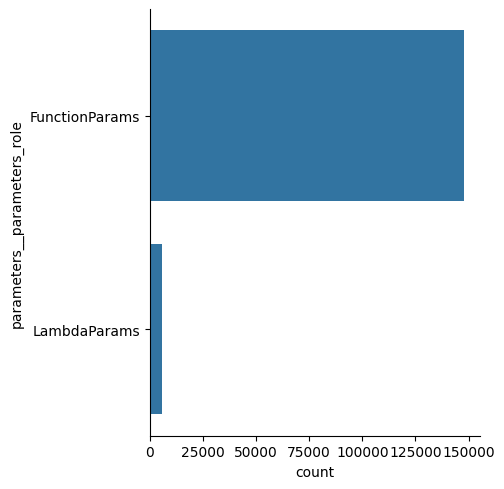

In [37]:
sns.catplot(full_table['parameters__parameters_role'], kind="count")

In [38]:
print_frequency_anal_for_cat_var(full_table, 'parameters__parameters_role')

La variable parameters__parameters_role contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable parameters__parameters_role toma el valor de FunctionParams en un 96.15% de los items.
La variable parameters__parameters_role toma el valor de LambdaParams en un 3.853% de los items.


In [39]:
print_values_usage_for_cat_var(full_table, 'parameters__parameters_role', PARAMETER_ROLE_VALUES)

La variable parameters__parameters_role puede tomar 2 valores distintos
	2 (100.0%) valores utilizados
	0 (0.0%) valores NO utilizados


### Variable name_convention (10/10)
Esta variable es de tipo categorica y representa el name convention del nombre del parámetro.

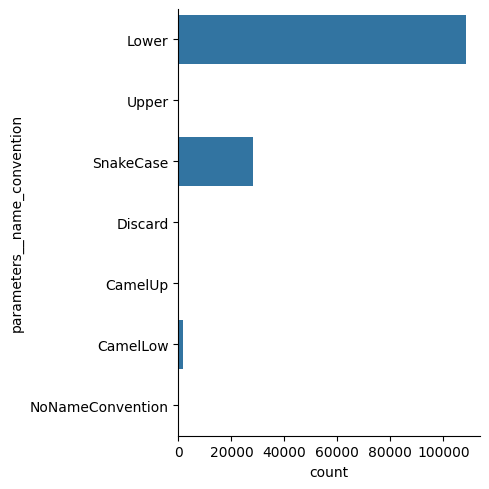

In [40]:
sns.catplot(full_table['parameters__name_convention'], kind="count")

In [41]:
print_frequency_anal_for_cat_var(full_table, 'parameters__name_convention')

La variable parameters__name_convention contiene 8 valores distintos.
El umbral de outlier es de 0.025%
La variable parameters__name_convention toma el valor de Lower en un 70.46% de los items.
La variable parameters__name_convention toma el valor de SnakeCase en un 18.32% de los items.
La variable parameters__name_convention toma el valor de None en un 9.518% de los items.
La variable parameters__name_convention toma el valor de CamelLow en un 1.088% de los items.
La variable parameters__name_convention toma el valor de Discard en un 0.2632% de los items.
La variable parameters__name_convention toma el valor de CamelUp en un 0.1501% de los items.
La variable parameters__name_convention toma el valor de Upper en un 0.1371% de los items.
La variable parameters__name_convention toma el valor de NoNameConvention en un 0.05783% de los items.


In [42]:
print_values_usage_for_cat_var(full_table, 'parameters__name_convention', NAMING_CONVENTION_VALUES)

La variable parameters__name_convention puede tomar 7 valores distintos
	8 (114.3%) valores utilizados
	0 (0.0%) valores NO utilizados
La variable parameters__name_convention toma 1 valores desconocidos
		La variable parameters__name_convention toma valor el desconocido None.


## Multivariate

Isolation forest algorithm

In [43]:
from sklearn.ensemble import  IsolationForest

CONTAMINATION_FACTOR = 0.0012
isof_model = IsolationForest(contamination=CONTAMINATION_FACTOR, random_state=0)
isof_prediction = isof_model.fit_predict(X.values)
mask = isof_prediction == -1
full_table.loc[X.index[mask]]

,parameters__parameters_role,parameters__number_of_params,parameters__pos_only_param_pct,parameters__var_param_pct,parameters__has_var_param,parameters__type_annotation_pct,parameters__kw_only_param_pct,parameters__has_kw_param,parameters__default_value_pct,parameters__name_convention,parameters__expertise_level
792,FunctionParams,5,0.0,0.200000,True,0.0,0.400000,True,0.400000,Lower,BEGINNER
1116,FunctionParams,7,0.0,0.142857,True,0.0,0.571429,True,0.571429,Lower,BEGINNER
1860,LambdaParams,2,0.0,0.500000,True,0.0,0.000000,True,0.000000,SnakeCase,BEGINNER
1911,LambdaParams,1,0.0,1.000000,True,0.0,0.000000,False,0.000000,Discard,BEGINNER
3005,LambdaParams,1,0.0,1.000000,True,0.0,0.000000,False,0.000000,Lower,BEGINNER
...,...,...,...,...,...,...,...,...,...,...,...
145214,FunctionParams,20,0.0,0.000000,False,0.9,0.900000,True,0.900000,SnakeCase,EXPERT
152469,LambdaParams,2,0.0,0.500000,True,0.0,0.000000,True,0.000000,Lower,EXPERT
152470,LambdaParams,2,0.0,0.500000,True,0.0,0.000000,True,0.000000,Lower,EXPERT
152472,LambdaParams,2,0.0,0.500000,True,0.0,0.000000,True,0.000000,Lower,EXPERT


### IMPORTANTE
Revisar los outliers detectados.

In [44]:
# Outliers
np.transpose(X[mask].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,mean,std,min,25%,50%,75%,max
parameters__number_of_params,171.0,5.134503,7.004161,1.0,1.0,2.0,5.00,39.000000
parameters__pos_only_param_pct,171.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.000000
parameters__var_param_pct,171.0,0.509109,0.347324,0.0,0.2,0.5,1.00,1.000000
parameters__has_var_param,171.0,0.842105,0.365713,0.0,1.0,1.0,1.00,1.000000
parameters__type_annotation_pct,171.0,0.241007,0.394311,0.0,0.0,0.0,0.75,1.000000
parameters__kw_only_param_pct,171.0,0.201735,0.341010,0.0,0.0,0.0,0.40,0.974359
parameters__default_value_pct,171.0,0.204951,0.345243,0.0,0.0,0.0,0.40,0.974359
parameters__has_kw_param,171.0,0.719298,0.450662,0.0,0.0,1.0,1.00,1.000000
parameters__parameters_role_FunctionParams,171.0,0.292398,0.456200,0.0,0.0,0.0,1.00,1.000000
parameters__parameters_role_LambdaParams,171.0,0.707602,0.456200,0.0,0.0,1.0,1.00,1.000000


In [45]:
# Non-Outliers
np.transpose(X[~mask].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,mean,std,min,25%,50%,75%,max
parameters__number_of_params,153727.0,1.981461,1.937124,0.0,1.0,2.0,2.0,58.000000
parameters__pos_only_param_pct,153727.0,0.000029,0.004186,0.0,0.0,0.0,0.0,0.666667
parameters__var_param_pct,153727.0,0.009024,0.070352,0.0,0.0,0.0,0.0,1.000000
parameters__has_var_param,153727.0,0.020380,0.141298,0.0,0.0,0.0,0.0,1.000000
parameters__type_annotation_pct,153727.0,0.164215,0.323620,0.0,0.0,0.0,0.0,1.000000
parameters__kw_only_param_pct,153727.0,0.005067,0.058688,0.0,0.0,0.0,0.0,1.000000
parameters__default_value_pct,153727.0,0.083585,0.209124,0.0,0.0,0.0,0.0,1.000000
parameters__has_kw_param,153727.0,0.059788,0.237094,0.0,0.0,0.0,0.0,1.000000
parameters__parameters_role_FunctionParams,153727.0,0.962212,0.190683,0.0,1.0,1.0,1.0,1.000000
parameters__parameters_role_LambdaParams,153727.0,0.037788,0.190683,0.0,0.0,0.0,0.0,1.000000
